In [47]:
from src.models.multi_layer_perceptron.mlp import MLP
from src.data.data_helpers import load_mnist
from src.models.multi_layer_perceptron.activations import ReLU, Softmax
from src.visualizations.dataset import plot_random_mnist_samples
from src.visualizations.evaluation import plot_confusion_matrix, plot_classification_metric_summary
from src.evaluation.model_evaluation import get_classification_metric_summary
import numpy as np


In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(
    test_size=0.30, validation_size=0.20, OHE=True
)

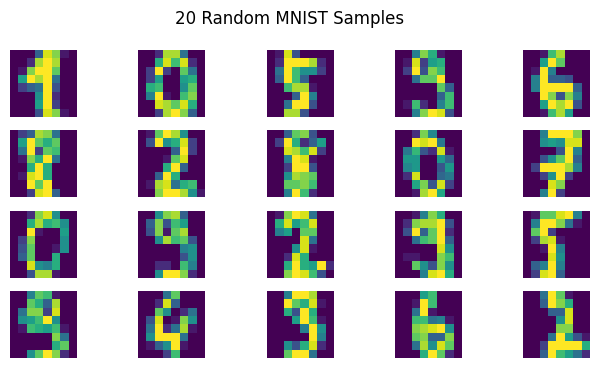

In [3]:
plot_random_mnist_samples(X_train, 20)

In [4]:
# configuration for the training of the MLP
config = {
    "lr": 0.001, # learning rate
    "batch_size": 32, # number of samples to run forward and backward propagation on at a time
    "epochs": 100, # number of training passes over the whole training data
    "validation_set": (X_val, y_val), # for hyperparameter tuning
    "lr_decay": 0.01, # allows for finer learning rate as we approach a minima
    "regularization_parameter": 0.01, # how much should the weight magnitude count towards the loss
}

model = MLP(
    input_feature_size=X_train.shape[1],
    layer_dimensions=[32, 32, 10],
    activations=[ReLU(), ReLU(), Softmax()],
    config=config,
)

[Epoch 1][Batch 19/45]:  22%|██▏       | 10/45 [00:00<00:00, 95.25batch/s, loss=2.29]

[Epoch 100][Batch 45/45]: 100%|██████████| 45/45 [00:00<00:00, 105.53batch/s, loss=0.147]


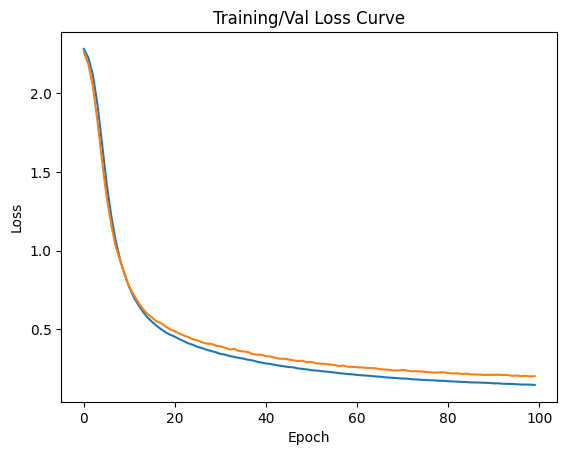

In [5]:
model.train(X_train, y_train)

In [44]:
y_test_pred_class = np.argmax(model(X_test), axis=1)
y_test_class = np.argmax(y_test, axis=1)

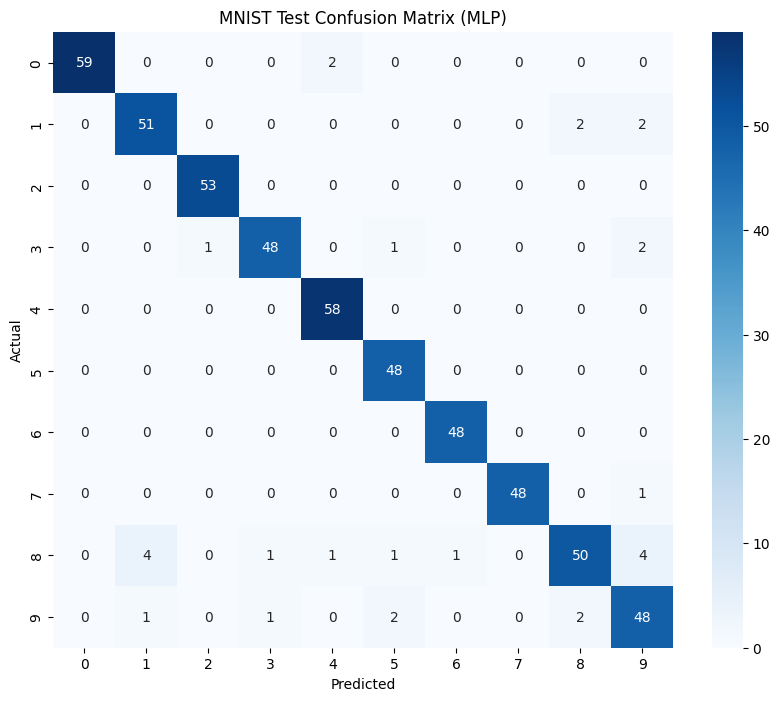

In [46]:
plot_confusion_matrix(y, y_test_pred_class, "MNIST Test Confusion Matrix (MLP)")

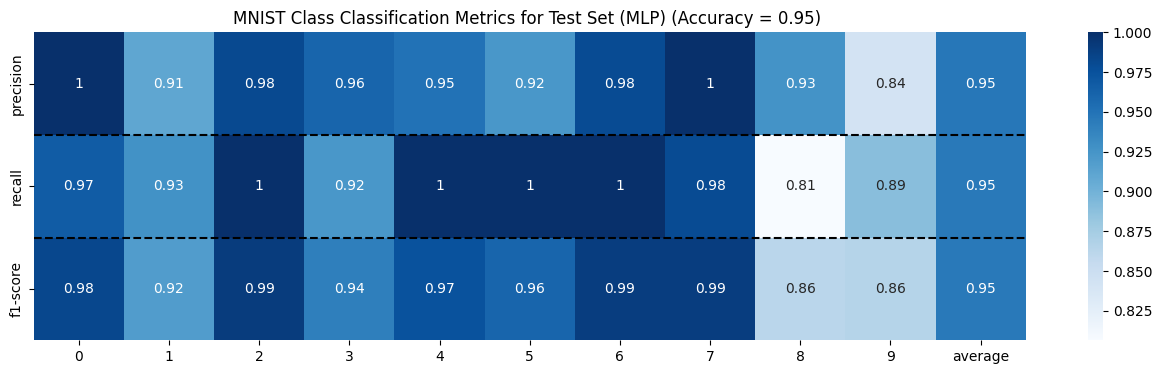

In [146]:
class_metrics, accuracy = get_classification_metric_summary(y_test_class, y_test_pred_class)
plot_classification_metric_summary(class_metrics, f"MNIST Class Classification Metrics for Test Set (MLP) (Accuracy = {accuracy:.2f}) ")